In [1]:
!pip install plotly
!pip install scikit-learn
!pip install numpy
!pip install pandas
!pip install seaborn

In [2]:
import sklearn as sk
import numpy as np
import plotly.express as px
import pandas as pd
import seaborn as sns

In [ ]:
# Loading Datasets
data = pd.read_csv('./data.csv')

encoded = pd.DataFrame()

data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Premis Desc,Weapon Desc,LOCATION,LAT,LON
649274,240404866,01/29/2024 12:00:00 AM,01/28/2024 12:00:00 AM,1735,Hollenbeck,CRIMINAL HOMICIDE,14,M,STREET,HAND GUN,1ST,34.0450,-118.2256
649823,242108414,04/25/2024 12:00:00 AM,04/25/2024 12:00:00 AM,1600,Topanga,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,M,STREET,HAND GUN,21400 SHERMAN WY,34.2010,-118.5977
651710,240604934,01/21/2024 12:00:00 AM,01/21/2024 12:00:00 AM,1510,Hollywood,BATTERY - SIMPLE ASSAULT,22,F,MISSIONS/SHELTERS,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",1300 N WESTERN AV,34.0944,-118.3125
653651,242107187,03/22/2024 12:00:00 AM,03/22/2024 12:00:00 AM,1815,Topanga,BATTERY - SIMPLE ASSAULT,58,M,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",22000 GILMORE ST,34.1876,-118.6070
662898,240310004,04/25/2024 12:00:00 AM,04/25/2024 12:00:00 AM,1700,Southwest,BATTERY - SIMPLE ASSAULT,19,F,PARKING LOT,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",3000 S FIGUEROA ST,34.0268,-118.2808


In [6]:
# Time Conversion

# Combine DATE OCC and TIME OCC into a single datetime column
data['DATE OCC'] = pd.to_datetime(data['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p')
#data['DATE OCC'] = pd.to_datetime(data['DATE OCC'] + ' ' + data['TIME OCC'], format='%Y-%m-%d %M:%S')
# Convert the datetime column to Unix timestamps
encoded['UNIX_TIMESTAMP'] = data['DATE OCC'].apply(lambda x: x.timestamp())
encoded['TIME OCC'] = data['TIME OCC'].copy()
data

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Premis Desc,Weapon Desc,LOCATION,LAT,LON
649274,240404866,01/29/2024 12:00:00 AM,2024-01-28,1735,Hollenbeck,CRIMINAL HOMICIDE,14,M,STREET,HAND GUN,1ST,34.0450,-118.2256
649823,242108414,04/25/2024 12:00:00 AM,2024-04-25,1600,Topanga,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,M,STREET,HAND GUN,21400 SHERMAN WY,34.2010,-118.5977
651710,240604934,01/21/2024 12:00:00 AM,2024-01-21,1510,Hollywood,BATTERY - SIMPLE ASSAULT,22,F,MISSIONS/SHELTERS,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",1300 N WESTERN AV,34.0944,-118.3125
653651,242107187,03/22/2024 12:00:00 AM,2024-03-22,1815,Topanga,BATTERY - SIMPLE ASSAULT,58,M,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",22000 GILMORE ST,34.1876,-118.6070
662898,240310004,04/25/2024 12:00:00 AM,2024-04-25,1700,Southwest,BATTERY - SIMPLE ASSAULT,19,F,PARKING LOT,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",3000 S FIGUEROA ST,34.0268,-118.2808
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004884,241604405,01/14/2024 12:00:00 AM,2024-01-13,720,Foothill,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",36,M,STREET,OTHER KNIFE,8700 LANKERSHIM BL,34.2271,-118.3878
1004886,242004546,01/16/2024 12:00:00 AM,2024-01-16,1510,Olympic,BATTERY - SIMPLE ASSAULT,80,F,BUS STOP,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",HOBART BL,34.0690,-118.3054
1004890,241414280,10/16/2024 12:00:00 AM,2024-10-16,1546,Pacific,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",46,M,VIDEO RENTAL STORE,UNKNOWN WEAPON/OTHER WEAPON,5200 W 98TH ST,33.9469,-118.3703
1004892,240104953,01/15/2024 12:00:00 AM,2024-01-15,100,Central,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0,X,HOTEL,UNKNOWN WEAPON/OTHER WEAPON,1300 W SUNSET BL,34.0685,-118.2460


In [7]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the LabelEncoder to the 'Crm Cd Desc' column
label_encoder.fit(data['Crm Cd Desc'])
# Transform the 'Crm Cd Desc' column
encoded['Crm Cd Desc'] = label_encoder.transform(data['Crm Cd Desc'])

# Fit the LabelEncoder to the 'AREA NAME' column
label_encoder.fit(data['AREA NAME'])
# Transform the 'AREA NAME' column
encoded['AREA NAME'] = label_encoder.transform(data['AREA NAME'])

# Fit the LabelEncoder to the 'AREA NAME' column
label_encoder.fit(data['Vict Sex'])
# Transform the 'AREA NAME' column
encoded['Vict Sex'] = label_encoder.transform(data['Vict Sex'])

# Fit the LabelEncoder to the 'AREA NAME' column
label_encoder.fit(data['Premis Desc'])
# Transform the 'AREA NAME' column
encoded['Premis Desc'] = label_encoder.transform(data['Premis Desc'])

# Fit the LabelEncoder to the 'AREA NAME' column
label_encoder.fit(data['Weapon Desc'])
# Transform the 'AREA NAME' column
encoded['Weapon Desc'] = label_encoder.transform(data['Weapon Desc'])

# Fit the LabelEncoder to the 'AREA NAME' column
label_encoder.fit(data['LOCATION'])
# Transform the 'AREA NAME' column
encoded['LOCATION'] = label_encoder.transform(data['LOCATION'])


encoded.to_csv('encoded.csv', index=True)
data.to_csv('data.csv', index=True)
encoded


,UNIX_TIMESTAMP,TIME OCC,Crm Cd Desc,AREA NAME,Vict Sex,Premis Desc,Weapon Desc,LOCATION
649274,1.706400e+09,1735,22,5,2,206,25,3705
649823,1.714003e+09,1600,71,16,2,206,25,4212
651710,1.705795e+09,1510,4,6,0,88,59,1803
653651,1.711066e+09,1815,4,16,2,195,59,4328
662898,1.714003e+09,1700,4,15,0,172,59,5073
...,...,...,...,...,...,...,...,...
1004884,1.705104e+09,720,2,3,2,206,38,8918
1004886,1.705363e+09,1510,4,11,0,21,59,9995
1004890,1.729037e+09,1546,78,12,2,232,69,6557
1004892,1.705277e+09,100,85,1,3,72,69,1886


                UNIX_TIMESTAMP  TIME OCC  Crm Cd Desc  AREA NAME  Vict Sex  \
UNIX_TIMESTAMP        1.000000 -0.009685     0.169872   0.021457  0.043033   
TIME OCC             -0.009685  1.000000    -0.026836   0.005878  0.009605   
Crm Cd Desc           0.169872 -0.026836     1.000000   0.022025  0.004997   
AREA NAME             0.021457  0.005878     0.022025   1.000000  0.008140   
Vict Sex              0.043033  0.009605     0.004997   0.008140  1.000000   
Premis Desc           0.062746  0.010107     0.039510  -0.010644 -0.099213   
Weapon Desc           0.058347 -0.010642     0.111560   0.031881 -0.138847   
LOCATION              0.023473  0.007213    -0.006007  -0.047186  0.033672   

                Premis Desc  Weapon Desc  LOCATION  
UNIX_TIMESTAMP     0.062746     0.058347  0.023473  
TIME OCC           0.010107    -0.010642  0.007213  
Crm Cd Desc        0.039510     0.111560 -0.006007  
AREA NAME         -0.010644     0.031881 -0.047186  
Vict Sex          -0.099213    -

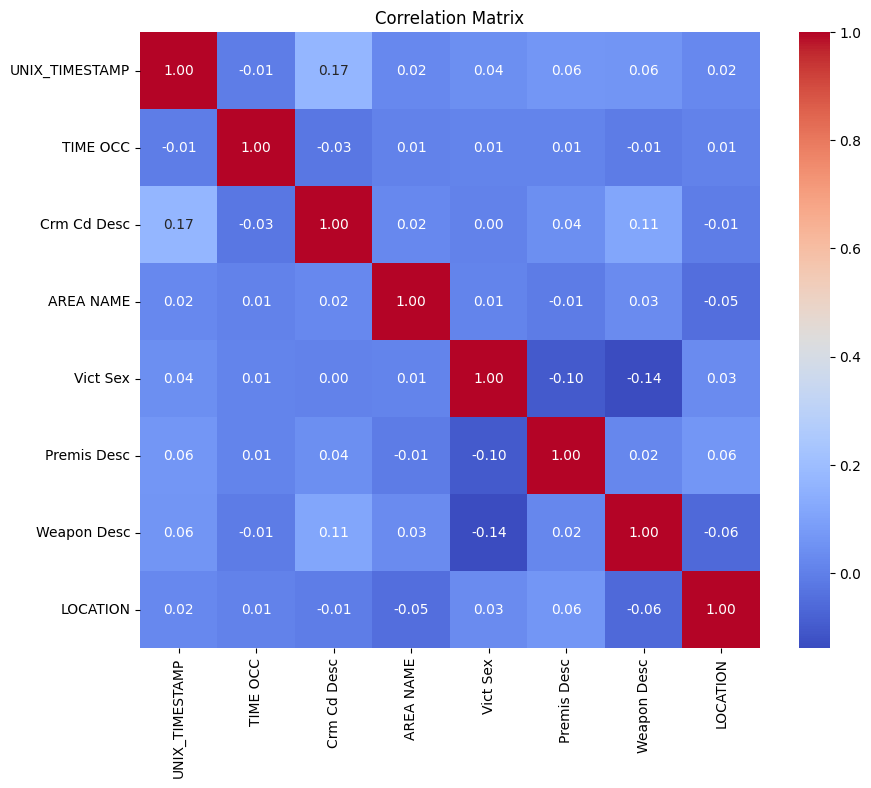

In [9]:
import matplotlib.pyplot as plt

# Assuming 'encoded' is your DataFrame with encoded data
# Compute the correlation matrix
correlation_matrix = encoded.corr()

# Display the correlation matrix
print(correlation_matrix)

# Optionally, visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

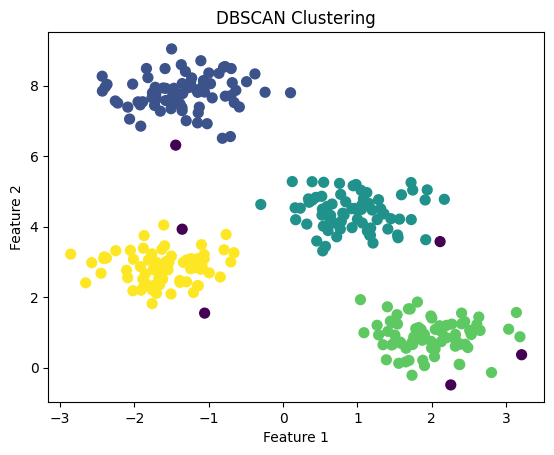

In [1]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Beispiel-Daten erstellen
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.5, random_state=0)

# DBSCAN-Modell erstellen
dbscan = DBSCAN(eps=0.5, min_samples=5)  # eps: Radius, min_samples: Mindestanzahl von Punkten in einem Cluster
labels = dbscan.fit_predict(X)

# Ergebnisse visualisieren
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()